In [27]:
import pandas as pd
import numpy as np
import requests
import io

In [30]:
url = 'https://raw.githubusercontent.com/zarvandeh/datasets/main/carsale.csv' 

ddf = pd.read_csv(url, encoding='latin-1')


print(df)

                car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kug

In [28]:
import pandas as pd 
import requests

url = 'https://raw.githubusercontent.com/zarvandeh/datasets/main/carsale.csv'

# Use requests to get the content of the CSV file
response = requests.get(url)

# Read the CSV content into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

print(df)

                car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kug

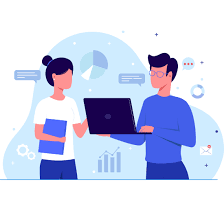

# Question by Data analyst

### Are there any missing values in the columns like engine size or drive type?

In [116]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

Based on the output, there are 434 missing values in the 'engV' column and 511 missing values in the 'drive' column. This indicates there is a significant amount of missing data in these two columns.

When thinking about missing data, here are some strategies we could consider:

For numeric columns like 'engV', we could fill missing values with the mean or median. This assumes the data is missing at random.
For categorical columns like 'drive', we could fill missing values with the mode or most frequent value. Again, assuming missing at random.
Alternatively, we could drop rows that have missing values in these columns, if we don't want to make assumptions about the missing data.
We could also leave the missing values as is, which would require handling them appropriately in analysis. For example, skipping rows with missing values.
If there seems to be a pattern in what is missing, we could try to model the missing values based on other columns.
The best approach depends on the amount of missing data and the type of analysis planned. Since there is significant missing data in 'engV' and 'drive', dropping those rows or imputing sensible values may be better than leaving them missing. We'll have to investigate the data further to make the right choice. The key is documenting assumptions made about the missing values.

### What are the data types of each column? Should price be float instead of object?

In [117]:
df.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

Based on the output, the dtypes seem appropriate for most columns except:

'car' could be converted to category dtype since it contains the same value in all rows
'body', 'engType', 'registration', and 'drive' contain categorical data so could also be converted to 'category'
'price' is numeric so is correctly float64, same with 'mileage' and 'engV' as integers
Here is code to convert the appropriate columns to 'category' dtype:

In [118]:
categorical_cols = ['car','body', 'engType', 'registration', 'drive']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype('category'))

In [119]:
df.dtypes

car             category
price            float64
body            category
mileage            int64
engV             float64
engType         category
registration    category
year               int64
model             object
drive           category
dtype: object

### What is the structure of the data? How many rows and columns are in the car dataset?

In [120]:
df.shape

(9576, 10)

#### What is the range of engine sizes? Is there an outlier maximum value?

In [121]:
df['engV'].describe()

count    9142.000000
mean        2.646344
std         5.927699
min         0.100000
25%         1.600000
50%         2.000000
75%         2.500000
max        99.990000
Name: engV, dtype: float64

Here are a few key things we can analyze from the describe() output for the 'engV' (engine size) column:

There are 9142 non-null values as indicated by the count.
The mean engine size is 2.646 liters. This gives us a sense of the average engine size.
The relatively high standard deviation of 5.927 indicates there is wide variation in engine sizes in the data.
The min and max values show the range is from 0.1 liters to 99.99 liters. The max seems unusually high and potentially an outlier.
The 25th percentile is 1.6, 50th percentile (median) is 2.0, and 75th percentile is 2.5. This shows 50% of the data is between 1.6 and 2.5 liters.
There is a right skew in the data indicated by the median of 2.0 being lower than the mean of 2.646.

In summary, these describe() metrics give us a good sense of the distribution, range, variation, and shape of the engine size data. We can see potential outliers at the max value, and determine that most of the data is concentrated between 1.6 and 2.5 liters. This can inform how we analyze or transform the column.

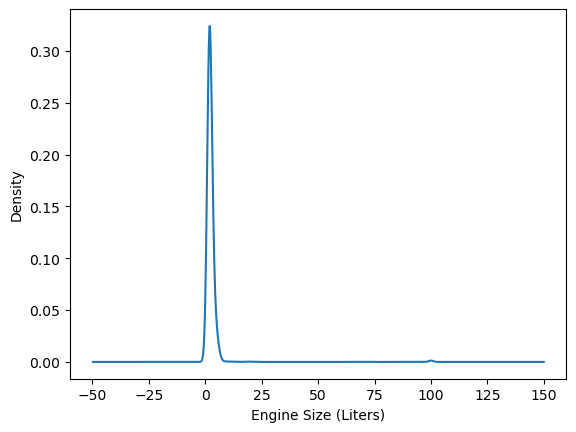

In [123]:
import matplotlib.pyplot as plt
# Density plot
df['engV'].plot.density()
plt.xlabel('Engine Size (Liters)')  
plt.ylabel('Density')

plt.show()

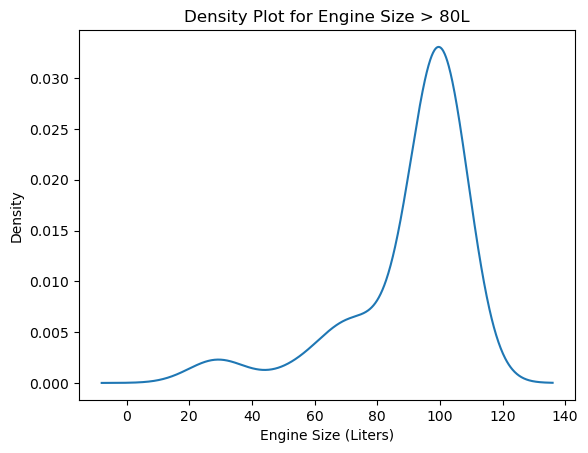

In [149]:
df_large = df[df['engV'] > 25]

# Density plot 
df_large['engV'].plot.density()

plt.xlabel('Engine Size (Liters)')
plt.ylabel('Density')
plt.title('Density Plot for Engine Size > 80L')

plt.show()

This graph shows the distribution of engine sizes in liters for a car data set. The engine size is a measure of the volume of the cylinders in the engine, which affects the power and fuel efficiency of the car. The graph is a kernel density estimate, which is a smoothed version of the histogram that estimates the probability density function of the variable.

The graph reveals that the engine size has a skewed distribution, with most of the values concentrated around 0 liters. This indicates that most of the cars in the data set have small engines, which are typically more fuel-efficient and less powerful than larger engines. The graph also shows that there are some outliers in the data, such as cars with negative or very large engine sizes. These values may be due to errors in the data collection or entry process, or they may represent rare or special types of cars.

In [124]:
# Calculate quantiles 
q1 = df['engV'].quantile(0.25)
q3 = df['engV'].quantile(0.75)
iqr = q3 - q1

In [135]:
outliers = df[(df['engV'] < q1 - 10*iqr) | (df['engV'] > q3 + 10*iqr)]

In [136]:
outliers

,car,price,body,mileage,engV,engType,registration,year,model,drive
184,Audi,4600.0000,vagon,242,99.99,Diesel,no,2004,A6,front
254,Audi,1950.0000,sedan,320,19.00,Other,no,1996,A4,NaN
256,Subaru,14000.0000,crossover,171,99.99,Petrol,yes,2010,Forester,full
499,Smart,4200.0000,other,130,99.99,Petrol,yes,2002,Fortwo,NaN
1116,Renault,0.0000,van,192,99.99,Diesel,yes,2011,Kangoo ����.,front
1158,Audi,4000.0000,sedan,260,99.99,Diesel,no,2000,A6,full
1647,Volkswagen,11350.0000,van,190,75.00,Diesel,yes,2011,T5 (Transporter) ����,front
1672,ZAZ,1800.0000,hatch,150,99.99,Gas,yes,2004,1102 ������,front
1752,Mazda,12850.0000,crossover,125,99.99,Other,yes,2009,CX-7,full
1916,Opel,3000.0000,sedan,276,17.00,Diesel,yes,1993,Vectra A,NaN


Here are 20 potential questions that could be explored with EDA on this car dataset:

What is the average price of cars in the dataset?
What is the most common body type of cars?
How many different models of cars are there? (df['model'].nunique())
What is the median mileage of the cars? (df['mileage'].median())
What is the maximum engine size? (df['engV'].max())
How many cars have diesel engines? (df[df['engType']=='Diesel'].shape[0])
What are the unique engine types? (df['engType'].unique())
What is the minimum mileage? (df['mileage'].min())
How many cars are registered as 'yes'? (df[df['registration']=='yes'].shape[0])
What are the unique car body types? (df['body'].unique())
What is the most common drive type? (df['drive'].mode()[0])
How many models were made in 2010? (df[df['year']==2010].shape[0])
What is the average mileage per body type? (df.groupby('body')['mileage'].mean())
How many unique models exist per year? (df.groupby('year')['model'].nunique())
What is the average price per drive type? (df.groupby('drive')['car price'].mean())
What is the median mileage per engine type? (df.groupby('engType')['mileage'].median())
What is the max price per car body type? (df.groupby('body')['car price'].max())
How many diesel cars exist per year? (df[df['engType']=='Diesel'].groupby('year').count())
What is the average engine size per model? (df.groupby('model')['engV'].mean())
How many models exist for each drive type? (df.groupby('drive')['model'].nunique())

# Answers to above questions:

### Question 1: Use the Pandas mean() function to get average price

In [33]:
print(df['price'].mean())

15633.317315961785


### Question 2: Use value_counts() and idxmax() to get the most common body type

In [35]:
# 2. Most common body type  
print(df['body'].value_counts())

sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64


In [47]:
maxind=df['body'].value_counts().argmax()

In [48]:
df['body'].value_counts()[maxind]

3646

In [45]:
df['body'].value_counts().idxmax()

'sedan'

### How many different models of cars are there?

In [52]:
#Number of unique models
print(df['model'].nunique())

863


### What is the median mileage of the cars? (df['mileage'].median())

In [53]:
#Median mileage
print(df['mileage'].median())

128.0


### What is the maximum engine size?

In [54]:
#4. Max engine size
print(df['engV'].max()) 

99.99


### How many cars have diesel engines?

In [55]:
#Number of diesel cars
print(df[df['engType']=='Diesel'].shape[0])

3013


In [60]:
#Unique engine types
print(df['engType'].nunique())
print(df['engType'].unique())

4
['Gas' 'Petrol' 'Diesel' 'Other']


In [59]:
print(df['engType'].value_counts())

Petrol    4379
Diesel    3013
Gas       1722
Other      462
Name: engType, dtype: int64


### What is the minimum mileage? 

In [61]:
df['mileage'].min()

0

### How many cars are registered as 'yes'?

In [63]:
df[df['registration']=='yes']

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [68]:
len(df[df['registration']=='yes'].index)

9015

In [70]:
df[df['registration']=='yes'].shape

(9015, 10)

### What are the unique car body types?

In [71]:
df['body'].unique()

array(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],
      dtype=object)

In [72]:
df['body'].value_counts()

sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64

### What is the most common drive type

In [75]:
df['drive'].unique()

array(['full', 'rear', 'front', nan], dtype=object)

In [77]:
df['drive'].value_counts()

front    5188
full     2500
rear     1377
Name: drive, dtype: int64

In [82]:
print(f"the most dive type is {df['drive'].value_counts().idxmax()}")

the most dive type is front


In [73]:
df['drive'].mode()

0    front
Name: drive, dtype: object

In [87]:
df['drive'].describe()

count      9065
unique        3
top       front
freq       5188
Name: drive, dtype: object

### How many models were made in 2010

In [90]:
models2010=df[df['year']==2010]

In [91]:
models2010

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear
73,Audi,35900.0,crossover,143,3.0,Diesel,yes,2010,Q7,full
84,Audi,36000.0,crossover,145,3.0,Petrol,yes,2010,Q7,full
88,Mercedes-Benz,16500.0,other,107,2.2,Diesel,yes,2010,Vito ����.,front
...,...,...,...,...,...,...,...,...,...,...
9353,Peugeot,12100.0,vagon,171,1.6,Diesel,yes,2010,5008,front
9357,VAZ,4700.0,vagon,75,1.6,Petrol,yes,2010,2171,front
9427,Kia,11300.0,hatch,67,1.6,Petrol,yes,2010,Ceed,front
9521,Daewoo,4600.0,sedan,116,1.5,Gas,yes,2010,Lanos,front


In [88]:
df[df['year']==2010].shape[0]

389

### Advanced questions:

#### What are the models of cars with mileage between 100 and 150 (inclusive) that are also registered as 'yes'?

In [96]:
over100miles= df['mileage'] >= 100
under150miles = df['mileage'] <= 150
registered = df['registration'] == 'yes'
targetcars=df[over100miles & under150miles & registered]


In [97]:
targetcars.describe()

,price,mileage,engV,year
count,2161.000000,2161.000000,2069.000000,2161.000000
mean,12277.569556,125.511337,2.541692,2007.330403
std,9778.911922,15.060310,5.698772,4.886209
min,0.000000,100.000000,0.600000,1961.000000
25%,6300.000000,112.000000,1.600000,2007.000000
50%,9700.000000,126.000000,2.000000,2008.000000
75%,15000.000000,139.000000,2.500000,2010.000000
max,64000.000000,150.000000,99.990000,2014.000000


In [98]:
targetcars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 2 to 9574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           2161 non-null   object 
 1   price         2161 non-null   float64
 2   body          2161 non-null   object 
 3   mileage       2161 non-null   int64  
 4   engV          2069 non-null   float64
 5   engType       2161 non-null   object 
 6   registration  2161 non-null   object 
 7   year          2161 non-null   int64  
 8   model         2161 non-null   object 
 9   drive         2051 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 185.7+ KB


In [107]:
targetcars['model'].value_counts()

Kangoo ����.    59
Camry           49
Octavia A5      43
Aveo            42
Lanos           37
                ..
CLS 350          1
2123             1
Sienna           1
Cordoba          1
Passat B2        1
Name: model, Length: 426, dtype: int64

In [104]:
df[(df['mileage'] >= 100) & (df['mileage'] <= 150) & (df['registration'] == 'yes')]['model']

2          CL 550
8         E-Class
9         E-Class
32      Passat B6
35      Passat B6
          ...    
9553        21099
9570        Rav 4
9571       Tucson
9572    Passat B2
9574       ES 350
Name: model, Length: 2161, dtype: object

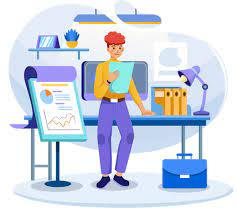

# Questions from sale manager :

#### What is the maximum price of cars that are either vans or have petrol engines?

In [110]:
df[(df['body'] == 'van') | (df['engType'] == 'Petrol')]

,car,price,body,mileage,engV,engType,registration,year,model,drive
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
10,Nissan,20447.154,crossover,0,1.2,Petrol,yes,2016,Qashqai,front
...,...,...,...,...,...,...,...,...,...,...
9566,UAZ,850.000,van,255,NaN,Other,yes,1981,3962,NaN
9570,Toyota,14474.000,crossover,115,2.0,Petrol,yes,2007,Rav 4,full
9572,Volkswagen,2200.000,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.000,crossover,180,3.5,Petrol,yes,2008,ML 350,full


#### Of the cars in our lot made before 2010 that are either rear wheel drive or full wheel drive, what is the typical mileage on them?

In [111]:
df[(df['year'] < 2010) & ((df['drive'] == 'full') | (df['drive'] == 'rear'))]

,car,price,body,mileage,engV,engType,registration,year,model,drive
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
13,BMW,4700.0,sedan,200,NaN,Petrol,yes,1996,316,rear
15,BMW,19999.0,sedan,290,4.8,Petrol,yes,2006,750,rear
25,BMW,23900.0,crossover,235,3.0,Diesel,yes,2007,X5,full
36,Jaguar,18777.0,sedan,82,3.0,Petrol,yes,2008,XF,rear
...,...,...,...,...,...,...,...,...,...,...
9567,Jeep,13990.0,crossover,210,3.0,Diesel,yes,2006,Grand Cherokee,full
9568,Mercedes-Benz,5000.0,vagon,248,2.0,Gas,yes,1996,E-Class,rear
9570,Toyota,14474.0,crossover,115,2.0,Petrol,yes,2007,Rav 4,full
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full


#### Of all the diesel cars we have, what are the different models we carry, listed from the oldest to newest?

In [114]:
df[df['engType'] == 'Diesel'].sort_values('year')

,car,price,body,mileage,engV,engType,registration,year,model,drive
7193,Mercedes-Benz,1950.0,sedan,1,2.0,Diesel,yes,1979,200,rear
6790,Volkswagen,2500.0,sedan,324,1.6,Diesel,yes,1984,Jetta,front
7961,Volkswagen,1300.0,other,10,1.6,Diesel,yes,1984,T2 (Transporter),rear
8535,Volkswagen,0.0,van,320,1.6,Diesel,yes,1985,T3 (Transporter),rear
8097,Mercedes-Benz,6000.0,sedan,350,2.0,Diesel,yes,1985,200,rear
...,...,...,...,...,...,...,...,...,...,...
5862,Mercedes-Benz,107000.0,van,0,2.2,Diesel,yes,2016,V 250,full
4016,Mercedes-Benz,87777.0,van,0,2.2,Diesel,yes,2016,V 250,full
2209,Mercedes-Benz,0.0,van,0,2.2,Diesel,yes,2016,V 250,full
2240,Land Rover,0.0,crossover,1,4.4,Diesel,yes,2016,Range Rover,full


#### For our crossover, van, and wagon cars that have an engine size smaller than 2.5, what is the average price tag on them?

In [115]:
df[(df['body'].isin(['crossover', 'van', 'vagon'])) & (df['engV'] < 2.5)]


,car,price,body,mileage,engV,engType,registration,year,model,drive
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
10,Nissan,20447.154,crossover,0,1.2,Petrol,yes,2016,Qashqai,front
18,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
...,...,...,...,...,...,...,...,...,...,...
9568,Mercedes-Benz,5000.000,vagon,248,2.0,Gas,yes,1996,E-Class,rear
9569,Volkswagen,18000.000,crossover,155,2.0,Diesel,yes,2011,Tiguan,full
9570,Toyota,14474.000,crossover,115,2.0,Petrol,yes,2007,Rav 4,full
9571,Hyundai,14500.000,crossover,140,2.0,Gas,yes,2011,Tucson,front


## Lets create some fake assumptions in this dataset:

In [151]:
df['invoice_price'] = df['price'] * 0.8 # Start with 80% of price


In [152]:
df.loc[df['year'] > 2010, 'invoice_price'] *= 1.1 # Increase 10% for newer cars

In [153]:
# Adjust invoice further based on mileage
high_mileage = df['mileage'] > 100000
df.loc[high_mileage, 'invoice_price'] *= 0.9 # Reduce 10% for high mileage

In [154]:
df.sample(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive,invoice_price
3177,Volkswagen,2000.0,sedan,300,1.3,Petrol,yes,1988,Jetta,front,1600.0
5514,Geely,8500.0,sedan,21,1.5,Gas,yes,2014,Emgrand 7 (EC7),front,7480.0
5436,Volkswagen,21550.0,crossover,58,1.4,Petrol,yes,2014,Tiguan,NaN,18964.0
2342,Skoda,8000.0,sedan,250,1.6,Petrol,yes,2007,Octavia A5,front,6400.0
4240,Mitsubishi,4200.0,sedan,270,2.0,Gas,yes,1998,Galant,front,3360.0
8998,Mercedes-Benz,33900.0,other,102,5.0,Petrol,yes,2008,CL 55 AMG,NaN,27120.0
1825,Volkswagen,6800.0,vagon,160,2.8,Petrol,yes,2001,Sharan,front,5440.0
6556,Nissan,5200.0,vagon,180,2.0,Gas,yes,2000,Primera,front,4160.0
3875,Nissan,37900.0,crossover,67,5.6,Petrol,yes,2011,Patrol,full,33352.0
3886,Mercedes-Benz,57000.0,crossover,3,2.2,Diesel,yes,2015,ML 250,full,50160.0


In [155]:
bins = [0, 10000, 20000, 30000, 40000, 50000]

In [156]:
labels = ['North', 'South', 'East', 'West', 'Central']

In [157]:
df['dealer_area'] = pd.cut(df['price'], bins=bins, labels=labels)

In [158]:
df.sample(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive,invoice_price,dealer_area
5290,Daewoo,5500.0000,hatch,8,0.8,Petrol,yes,2013,Matiz,front,4840.00000,North
2618,Audi,75000.0000,crossover,0,3.0,Diesel,yes,2015,Q7,full,66000.00000,NaN
4500,Opel,10900.0000,van,186,2.0,Diesel,yes,2007,Vivaro ����.,front,8720.00000,South
6286,Mitsubishi,17500.0000,other,69,2.5,Diesel,yes,2011,L 200,full,15400.00000,South
3997,Volkswagen,67622.5485,crossover,0,3.0,Diesel,yes,2016,Touareg,full,59507.84268,NaN
600,Audi,3800.0000,sedan,270,2.5,Diesel,no,2000,A6,front,3040.00000,North
2133,Mercedes-Benz,70000.0000,other,21,6.0,Petrol,yes,2008,S 600,rear,56000.00000,NaN
7525,Ford,4200.0000,van,200,2.0,Diesel,yes,2003,Transit ����.,front,3360.00000,North
432,Land Rover,99000.0000,crossover,50,4.4,Diesel,yes,2013,Range Rover,full,87120.00000,NaN
5555,Toyota,18800.0000,vagon,89,1.8,Petrol,yes,2012,Avensis,front,16544.00000,South


## new questions

### What is the average profit per unit sold for each dealer area?

In [159]:
df['profit'] = df['price'] - df['invoice_price']

In [160]:
df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive,invoice_price,dealer_area,profit
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,12400.0,South,3100.0
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,18040.0,East,2460.0
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,28000.0,West,7000.0
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,15664.0,South,2136.0
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN,29040.0,West,3960.0
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full,14608.0,South,1992.0
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front,5200.0,North,1300.0
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front,9240.0,South,1260.0
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear,18920.0,East,2580.0
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear,18160.0,East,4540.0


#### learning groupby() command


The groupby() method in pandas is very powerful for aggregate analysis. Here are the main parameters:

by - The column(s) to group by. Can be a single column name, a list of column names, or a pandas Series.
axis - Split along rows (0) or columns (1). Default is 0 to group by rows.
level - Group by specific index level(s) if the index is MultiIndex.
as_index - Whether to keep groupby columns as index (True) or make them columns (False). Default True.
sort - Whether to sort the groups by keys. True by default.
group_keys - Whether to produce group keys as column(s). Defaults False.
squeeze - Produce Series output if possible when grouping by a single column. Default True.
observed - Controls whether to remove NaN groups from results. Default True.
dropna - Controls handling of NaN values within groups. Default True.
Common aggregations:

mean(), sum(), size(), count(), std(), min(), max(), first(), last()
The output is either a DataFrame or Series aggregating by the groups.

Usage examples:

In [184]:
gdf=df.groupby(by='dealer_area',axis=0,as_index=True).sum()
gdf

,price,mileage,engV,year,invoice_price,profit
dealer_area,,,,,,
North,2.759376e+07,853075,11749.92,9891206,2.244591e+07,5.147856e+06
South,3.592625e+07,319565,6000.22,5115516,2.999463e+07,5.931618e+06
East,1.910104e+07,76713,2157.37,1574528,1.618504e+07,2.916006e+06
West,1.249480e+07,28155,1046.74,712145,1.067976e+07,1.815036e+06
Central,8.930533e+06,12760,672.89,400496,7.729597e+06,1.200936e+06


,price,mileage,engV,year,invoice_price,profit
dealer_area,,,,,,
North,2.759376e+07,853075,11749.92,9891206,2.244591e+07,5.147856e+06
South,3.592625e+07,319565,6000.22,5115516,2.999463e+07,5.931618e+06
East,1.910104e+07,76713,2157.37,1574528,1.618504e+07,2.916006e+06
West,1.249480e+07,28155,1046.74,712145,1.067976e+07,1.815036e+06
Central,8.930533e+06,12760,672.89,400496,7.729597e+06,1.200936e+06


In [162]:
df.groupby(by='dealer_area')['profit'].mean()

dealer_area
North      1042.498262
South      2329.779279
East       3724.145840
West       5127.221691
Central    6034.852653
Name: profit, dtype: float64

### Which dealer regions have the highest average invoice price?

In [185]:
df.groupby('dealer_area')['invoice_price'].mean()

dealer_area
North       4545.546045
South      11781.082024
East       20670.543314
West       30168.814060
Central    38842.195835
Name: invoice_price, dtype: float64

### How does average profit compare between diesel and petrol cars by dealer area?


In [186]:
df.groupby(['dealer_area', 'engType'])['profit'].mean()

dealer_area  engType
North        Diesel     1129.442128
             Gas        1015.329289
             Other       953.323461
             Petrol     1012.630286
South        Diesel     2253.512020
             Gas        2571.823910
             Other      2145.503673
             Petrol     2311.580678
East         Diesel     3531.267582
             Gas        4111.067407
             Other      3460.205128
             Petrol     3776.366321
West         Diesel     5024.625125
             Gas        6098.764615
             Other      4998.886667
             Petrol     5072.429626
Central      Diesel     5557.895384
             Gas        9083.333333
             Other      5989.320000
             Petrol     6294.790139
Name: profit, dtype: float64

### Looking at the different engine models we sell across each dealership region, which models tend to have the highest invoice price compared to the manufacturer's suggested retail price

In [188]:
df.groupby(['dealer_area', 'engType'])['invoice_price'].mean() / df.groupby(['dealer_area', 'engType'])['price'].mean()

dealer_area  engType
North        Diesel     0.815022
             Gas        0.809431
             Other      0.811885
             Petrol     0.814451
South        Diesel     0.836577
             Gas        0.818807
             Other      0.855099
             Petrol     0.837263
East         Diesel     0.856711
             Gas        0.828056
             Other      0.854629
             Petrol     0.845360
West         Diesel     0.858931
             Gas        0.826617
             Other      0.861385
             Petrol     0.855179
Central      Diesel     0.876585
             Gas        0.800000
             Other      0.868563
             Petrol     0.859005
dtype: float64